# 🎮 Workshop de Introdução ao Aprendizado por Reforço
⠀

Bem vindes ao **Workshop de Introdução ao Aprendizado por Reforço**, organizado pelo Grupo Turing! 

O objetivo deste evento é ensinar o básico necessário da área de Aprendizado por Reforço utilizando um dos maiores clássicos da história dos video-games: ***Pong***.

![Pong](https://media2.giphy.com/media/aTGwuEFyg6d8c/giphy.gif)

In [1]:
# Instala os ambientes do Grupo Turing
!pip install -U turing-envs

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: turing-envs in /home/schneider/.local/lib/python2.7/site-packages (0.1.1)


## 🏓 Sobre o Pong

Começaremos falando sobre o problema, ou seja, sobre o jogo Pong. Este que foi o primeiro jogo de video-game lucrativo da história, publicado em 1972, constando 48 anos de legado.

Pong simula uma partida de tênis, existem duas "raquetes" e uma bola, e o objetivo de cada uma das raquetes é não somente evitar que a bola passe por ela, como também fazer com que esta passe pela linha que a outra raquete protege, criando assim a premissa que sustenta o interesse pelo jogo. Queremos então desenvolver um algoritmo capaz de &mdash; sem nenhuma explicação adicional &mdash; maximizar as suas recompensas, sendo as ações, os estados e as recompensas, todas relativas ao jogo Pong. Teremos no final, portanto, um modelo treinado capaz de bom desempenho dentro do ambiente. 

## 💻 Programando...

### Importando o Gym

O **[Gym](https://gym.openai.com/)** é uma biblioteca desenvolvida pela OpenAI que contém várias implementações prontas de ambientes de Aprendizagem por Reforço. Ela é muito utilizada quando se quer testar um algoritmo de agente sem ter o trabalho de programar seu próprio ambiente.

<img src="https://user-images.githubusercontent.com/10624937/42135602-b0335606-7d12-11e8-8689-dd1cf9fa11a9.gif" alt="Exemplos de Ambientes do Gym" class="inline"/>
<figcaption>Exemplo de Ambientes do Gym</figcaption>
<br>

Para se ter acesso a esses ambientes, basta importar o Gym da seguinte forma:

In [2]:
import gym

### O que é um Ambiente?

Um **Ambiente** de Aprendizagem por Reforço é um espaço que representa o nosso problema, é o objeto com o qual o nosso agente deve interagir para cumprir sua função. Isso significa que o agente toma **ações** nesse ambiente, e recebe **recompensas** dele com base na qualidade de sua tomada de decisões.

Todos os ambientes são dotados de um **espaço de observações**, que é a forma pela qual o agente recebe informações e deve se basear para a tomada de decisões, e um **espaço de ações**, que especifica as ações possíveis do agente. No xadrez, por exemplo, o espaço de observações seria o conjunto de todas as configurações diferentes do tabuleiro, e o espaço de ações seria o conjunto de todos os movimentos permitidos.

<img src="https://www.raspberrypi.org/wp-content/uploads/2016/08/giphy-1-1.gif" alt="Uma Ação do Xadrez" class="inline"/>

### Como Funciona um Ambiente do Gym?

Agora que você já sabe o que é um ambiente, é preciso entender como nosso agente interage efetivamente com ele. Todos os ambientes do Gym possuem alguns métodos simples para facilitar a comunicação com eles:

<br>

| Método         | Funcionalidade                                        |
| :------------- |:----------------------------------------------------- |
| `reset()`      | Inicializa o ambiente e recebe a observação inicial   |
| `step(acao)`   | Executa uma ação e recebe a observação e a recompensa |
| `render()`     | Renderiza o ambiente                                  |
| `close()`      | Fecha o ambiente                                      |

<br>

Assim, o código para interagir com o ambiente costuma seguir o seguinte modelo:

---

```python
env = gym.make("Nome do Ambiente")                   # Cria o ambiente
estado = env.reset()                                 # Inicializa o ambiente
done = False                                         # Variável que diz se acabou

while not done:
    env.render()                                     # Renderiza o ambiente
    acao = random()                                  # Define alguma ação
    estado, recompensa, done, info = env.step(acao)  # Executa uma ação
    
env.close()                                          # Fecha o ambiente
```

---

### Criando um Ambiente

Para utilizar um dos ambientes do Gym, nós usamos a função ```gym.make()```, passando o nome do ambiente desejado como parâmetro e guardando o valor retornado em uma variável que chamaramos de ```env```. A lista com todos os ambientes do gym pode ser encontrada [aqui](https://gym.openai.com/envs/#classic_control). Nesse workshop, utilizaremos um ambiente de pong do Grupo Turing, que requer a instalação do [Turing Envs](https://github.com/GrupoTuring/turing-envs).

In [3]:
env = gym.make("turing_envs:pong-easy-v0")
env.seed(0)

[0]

Nesse caso, nós vamos utilizar o ambiente ```turing_envs:pong-easy-v0```, um ambiente que reproduz o jogo _Pong_.

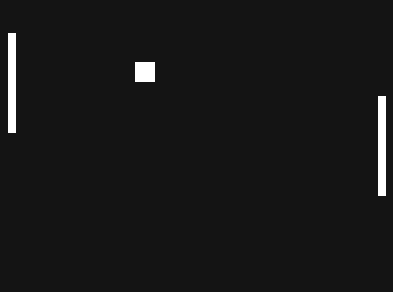

#### Características do Pong

Antes de treinar qualquer agente, primeiro é preciso entender melhor quais as características do nosso ambiente.

O **Espaço de Observação** do pong (modo fácil) é definido por 2 informações:

| Estado    | Informação                            |
| :-------- | :------------------------------------ |
| 0         | Distância _x_ entre a bola e o agente |
| 1         | Distância _y_ entre a bola e o agente |

Dessa forma, a cada instante recebemos uma lista da observação com o seguinte formato:

In [4]:
print(env.observation_space.sample())

[-376.07236  167.37572]


Já o **Espaço de Ação** é composto por três ações: mover o jogador para cima, baixo, ou deixá-lo parado:

| Ação | Significado      |
| :--- | :--------------- |
| 0    | Ficar parado     |
| 1    | Mover para baixo |
| 2    | Mover para cima  |

Por exemplo, para mover a barra para a cima, fazemos `env.step(2)`.

In [5]:
print(env.action_space.sample())

1


Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, conforme a tabela abaixo:

| Ocorrência          | Recompensa |
| :------------------ | ---------: |
| Ponto do Agente     | $+500$     |
| Ponto do Oponente   | $-500$     |
| Vitória do Agente   | $+2000$    |
| Vitória do Oponente | $-2000$    |

O primeiro jogador a fazer quatro pontos ganha o jogo. Além disso, as recompensas são cumulativas. Isso significa que se o oponente fizer um ponto _e_ ganhar o jogo, a recompensa é de $-2500$.

### ✍ Exercício de Gym

Agora que você já entende como o Gym funciona, vamos tentar aplicar esse conhecimento criando uma função que roda um episódio de Pong tomando ações aleatórias!

OBS: Lembrete das funções do Gym

| Método                 | Funcionalidade                                          |
| :--------------------- |:------------------------------------------------------- |
| `reset()`              | Inicializa o ambiente e recebe a observação inicial     |
| `step(acao)`           | Executa uma ação e recebe a observação e a recompensa   |
| `render()`             | Renderiza o ambiente                                    |
| `close()`              | Fecha o ambiente                                        |

In [6]:
# Essa função deve rodar um episodio de Pong escolhendo ações aleatórias
def rodar_ambiente():
    # Criando o ambiente 'turing_envs:pong-easy-v0'
    env = gym.make("turing_envs:pong-easy-v0")

    # Resete o ambiente e receba o primeiro estado
    estado = env.reset()

    # Inicializando done como false
    done = False

    # Loop de treino
    while not done:
        # Escolha uma acao aleatoria
        acao = env.action_space.sample()

        # Tome essa acao e receba as informacoes do estado seguinte
        prox_estado, recompensa, done, info = env.step(acao)

        # Renderize o ambiente
        env.render()

        # Atualizando o estado
        estado = prox_estado

    # Fechando o ambiente
    env.close()

In [7]:
# Testando a função
rodar_ambiente()

## 👩‍💻 Algoritmo

Primeiramente, precisaremos utilizar uma biblioteca chamada ***NumPy*** para auxiliar nas computações. Esta é uma biblioteca do Python capaz de manusear diversas computações matemáticas com maestria e será importante futuramente para o nosso trabalho.

In [8]:
import numpy as np # Importando a biblioteca NumPy
import gym         # Importando a Biblioteca Gym

# Criando o nosso Ambiente: Pong
env = gym.make("turing_envs:pong-easy-v0")

# Número total de ações: 3
# 0 = parado; 1 = baixo; 2 = cima
n_acoes = env.action_space.n

print('Número de ações:', n_acoes)

Número de ações: 3


### 🔢 Discretizando o nosso Estado

Como comentamos anteriormente, o estado que o nosso agente recebe consiste das distâncias horizontal e vertical da raquete controlada até a bola. Dessa forma, se a nossa tela possuir 800 unidades de largura e 600 unidades de altura, a quantidade total de diferentes estados possíveis seria aproximadamente $3 \times 800 \times 600 = 960000$.

Como Q-Learning é um algoritmo que guarda em uma tabela as estimativas do Q de cada ação para cada estado, esse gigantesco número de estados exigiria não somente guardar como atualizar cada um desses Q. Não é uma situação ideal.

Para simplificar (e agilizar) a situação, "discretizar" os nossos estados é razoável e esperado. Faremos com que estados similares o suficiente sejam considerados como iguais e comparilhem das mesmas estimativas, já que não faz sentido distinguir o estado (502,234) do estado (515,222).

In [9]:
def discretiza_estado(estado):
    return tuple(round(x/10) for x in estado)

### 🔀 Escolhendo Ações

Para o processo de de escolha de ação, é necessário lembrar do dilema entre **Exploração** e **Explotação**. Nosso modelo precisa estabelecer um equilíbrio entre **explorar o ambiente**, escolhendo ações que ele não costuma tomar para encontrar alguma solução que ele não havia pensado antes, e **aproveitar** o conhecimento que já possui, tomando ações que ele acredita serem as melhores para maximizar as recompensas que receberá no episódio.

De forma a assegurar que o agente busque tanto novas alternativas que podem gerar melhores resultados quanto seja capaz de utilizar o aprendizado obtido de forma a maximizar seu retorno, existem diversas estratégias para a escolha de exploração e explotação. Uma das mais utilizadas, que também vamos utilizar aqui, é a seleção de ações pela estratégia do **"$\epsilon$-greedy"**.

#### A Estratégia **$\epsilon$-greedy**

O algoritmo "$\epsilon$-greedy" é definido da seguinte forma: é retirado um número aleatório, no intervalo entre 0 e 1. caso este número tenha valor inferior ao valor do epsilon, a escolha será de uma ação aleatória, o que configura exploração. Caso este número seja superior ao epsilon, a ação a ser tomada é a que gera a maior recompensa de acordo com os valores da tabela Q.

Este valor de $\epsilon$ não é constante ao longo do treinamento. Inicialmente, este valor é alto, incentivando a maior exploração do ambiente. A medida que o treinamento ocorre, mais informação sobre o ambiente é adquirida, conseguindo uma tabela Q mais representativa da realidade. Dessa forma, quanto mais avançado no treinamento, menor a necessidade de exploração e maior a necessidade de exploitar o conhecimento adquirido para maximizar a recompensa. Esta atualização do $\epsilon$ é chamada **"$\epsilon$-decay"** (decaimento do epsilon). Também é estabelecido um valor mínimo para o $\epsilon$, para que o agente nunca pare completamente de explorar o ambiente.

In [23]:
# Constantes da Política Epsilon Greedy
# Epsilon: probabilidade de experimentar uma ação aleatória
EPSILON = 0.8        # Valor inicial do epsilon
EPSILON_MIN = 0.01   # Valor mínimo de epsilon
DECAIMENTO = 0.99    # Fator de decaímento do epsilon (por episódio)

In [11]:
def escolhe_acao(env, Q, estado, epsilon):
    # Se não conhecermos ainda o estado, inicializamos o Q de cada ação como 0
    if estado not in Q.keys(): Q[estado] = [0] * n_acoes

    # Escolhemos um número aleatório com "np.random.random()"
    # Se esse número for menor que epsilon, tomamos uma ação aleatória
    if np.random.random() < epsilon:
        # Escolhemos uma ação aleatória, com env.action_space.sample()
        acao = env.action_space.sample()
    else:
        # Escolhemos a melhor ação para o estado atual, com np.argmax()
        acao = np.argmax(Q[estado])
    return acao

Para rodar uma partida, são necessárias algumas etapas. Inicialmente, o ambiente é reiniciado, de forma a inicar um novo episódio. Em seguida, é necessário discretizar o estado, pelos motivos já explicados acima. Esta discretização deve ocorrer toda vez em que estamos em um novo estado.

Enquanto o ambiente não chega em seu estado terminal, indicado pela variável "done", será feito o processo de escolha de ações e, uma vez escolhida, deve-se receber do ambiente o próximo estado, a recompensa que a ação escolhida gerou, além do sinal se estamos no estado terminal. Todo o processo é repetido novamente para o próximo estado, até o final do episódio.

Como explicado na seção sobre a biblioteca "Gym", "env.render()" tem como papel mostrar o ambiente (neste caso, a partida de Pong)

In [14]:
def roda_partida(env, Q, renderiza=True):
    # Resetamos o ambiente
    estado = env.reset()

    # Discretizamos o estado
    estado = discretiza_estado(estado)
    
    done = False
    retorno = 0
    
    while not done:
        # Escolhemos uma ação
        acao = escolhe_acao(env, Q, estado, epsilon=0)

        # Tomamos nossa ação escolhida e recebemos informações do próximo estado
        prox_estado, recompensa, done, info = env.step(acao)

        # Discretizamos o próximo estado
        prox_estado = discretiza_estado(prox_estado)

        # Renderizamos o ambiente
        if renderiza:
            env.render()

        retorno += recompensa
        estado = prox_estado

    print(f'retorno {retorno:.1f},  '
          f'placar {env.score[0]}x{env.score[1]}')
    
    env.close()

In [15]:
# Rodamos uma partida de Pong
Q = {}
roda_partida(env, Q)

retorno -3500.0,  placar 1x4


## 🏋️‍♀️ Treinamento

Agora sim chegaremos no treinamento propriamente dito. Usando os conceitos vistos na apresentação e nas seções anteriores do notebook, podemos definir a função de treinamento que vai permitir que o agente aprenda a jogar PONG por meio de Q-Learning tabular.

O algoritmo se baseia na atualização de estimativas dos valores Q para cada par estado-ação, de forma a chegar a uma tabela cada vez mais próxima da realidade do ambiente. Dessa forma, devemos atualizar cada entrada da tabela de acordo com a **equação do Q-Learning**:

$$Q*(s,a) \leftarrow Q*(s,a) + \alpha \cdot \left[r + \gamma \cdot \max_{a'} (Q(s',a')) - Q(s, a)\right]$$

Esta equação corrige o valor do Q(s,a) de acordo com os valores anteriores somados a uma parecela de correção, de forma a minimizar o erro. A recompensa é representada por r, enquanto os outros parâmetros estão explicados a seguir:

* "ALFA" ($\alpha$): algoritmos de aprendizado de máquina costumam precisar de uma forma de serem otimizados. Q-learning trabalha em cima de gradientes, uma entidade matemática que indica a direção para maximizar (ou minimizar) uma função. Dispondo dessa direção, precisamos informar qual deve ser o tamanho do passo a ser dado antes de atualizar a nova "direção ideal".

* "GAMA" ($\gamma$): denota o quanto desejamos que nosso algoritmo considere eventos futuros. Se "$\gamma = 1$", nosso algoritmo avaliará que a situação futura ser melhor que a atual é tão importante quanto a recompensa da situação atual em si, por outro lado, se "$\gamma = 0$", os eventos futuros não apresentam importância alguma para nosso algoritmo. 

* "Q" é um dicionário, ou seja, uma estrtura de dados capaz de buscar elementos de forma rápida. Nós o usaremos para guardar valores relativos às estimativas do algoritmo.

In [16]:
# Hiperparâmetros do Q-Learning
ALFA = 0.05          # Learning rate
GAMA = 0.9           # Fator de desconto

# Dicionário dos valores de Q
# Chaves: estados; valores: qualidade Q atribuida a cada ação
Q = {}

In [17]:
def atualiza_q(Q, estado, acao, recompensa, prox_estado):
    # para cada estado ainda não descoberto, iniciamos seu valor como nulo
    if estado not in Q.keys(): Q[estado] = [0] * n_acoes
    if prox_estado not in Q.keys(): Q[prox_estado] = [0] * n_acoes

    # equação do Q-Learning
    Q[estado][acao] = (1-ALFA) * Q[estado][acao] + ALFA * (recompensa + GAMA * np.max(Q[prox_estado]))

Pickle é uma maneira de salvar dados em um arquivo independente. Dessa forma, podemos gravar os valores da nossa tabela Q em um arquivo próprio, ficando disponível para ser acessada em outro momento. Assim, podemos efetivamente salvar o modelo treinado para ser utilizado posteriormente. Abaixo, já estão presentes as funções de salvar e de abrir as tabelas com pickle.

In [18]:
import pickle

def salva_tabela(Q, nome = 'model.pickle'):
    with open(nome, 'wb') as pickle_out:
        pickle.dump(Q, pickle_out)

def carrega_tabela(nome = 'model.pickle'):
    with open(nome, 'rb') as pickle_out:
        return pickle.load(pickle_out)

A função de treinamento tem estrutura semelhante à função roda_partida, conforme visto anteriormente. A cada episódio, o embiente deve ser reiniciado e discretizado, e deve indicar que o episódio ainda não chegou em sua condição terminal. Devemos também zerar o valor da recompensa, pois não devemos utilizar o retorno do episódio anterior.

Enquanto o episódio não chega no final, o agente deve escolher uma ação e tomar a ação escolhida. Uma vez tomada a ação, o ambiente fornece o próximo estado, a recompensa recebida com a escolha, a indicação se o estado é terminal e informações sobre o ambiente.

Em seguida, devemos discretizar o próximo estado e atualizar os valores de q, o retorno e o estado atual.

Por fim, devemos atualizar o valor do epsilon, de acordo com o método $\epsilon$-greedy, onde deve ocorrer o decaimento do epsilon, mas seu valor nunca deve ser inferior ao valor mínimo definido.



* `N_EPISODIOS` dita quantas vezes o agente deverá "reviver" o ambiente (vitórias e derrotas) antes de acabar seu treinamento.

In [24]:
N_EPISODIOS = 500    # quantidade de episódios que treinaremos

In [20]:
def treina(env, Q):
    retornos = []      # retorno de cada episódio
    epsilon = EPSILON

    for episodio in range(1, N_EPISODIOS+1):
        # resetar o ambiente
        estado = env.reset()

        # discretizar o estado inicial
        estado = discretiza_estado(estado)
        
        done = False
        retorno = 0
        
        while not done:
            # escolher uma ação
            acao = escolhe_acao(env, Q, estado, epsilon)

            # tomar a ação
            prox_estado, recompensa, done, info = env.step(acao)

            # discretizar o próximo estado
            prox_estado = discretiza_estado(prox_estado)

            atualiza_q(Q, estado, acao, recompensa, prox_estado)

            retorno += recompensa
            estado = prox_estado

        # calcular o próximo epsilon
        epsilon = epsilon * DECAIMENTO
        epsilon = max(epsilon, EPSILON_MIN)

        retornos.append(retorno)

        if episodio % 10 == 0:
            salva_tabela(Q)

        print(f'episódio {episodio},  '
              f'retorno {retorno:7.1f},  '
              f'retorno médio (últimos 10 episódios) {np.mean(retornos[-10:]):7.1f},  '
              f'placar {env.score[0]}x{env.score[1]},  '
              f'epsilon: {epsilon:.3f}')
        
    env.close()

In [25]:
treina(env, Q)

x0,  epsilon: 0.034
episódio 316,  retorno  4000.0,  retorno médio (últimos 10 episódios)  3600.0,  placar 4x0,  epsilon: 0.033
episódio 317,  retorno  4000.0,  retorno médio (últimos 10 episódios)  3600.0,  placar 4x0,  epsilon: 0.033
episódio 318,  retorno  4000.0,  retorno médio (últimos 10 episódios)  3600.0,  placar 4x0,  epsilon: 0.033
episódio 319,  retorno  4000.0,  retorno médio (últimos 10 episódios)  3600.0,  placar 4x0,  epsilon: 0.032
episódio 320,  retorno  4000.0,  retorno médio (últimos 10 episódios)  3600.0,  placar 4x0,  epsilon: 0.032
episódio 321,  retorno  4000.0,  retorno médio (últimos 10 episódios)  3600.0,  placar 4x0,  epsilon: 0.032
episódio 322,  retorno  4000.0,  retorno médio (últimos 10 episódios)  3600.0,  placar 4x0,  epsilon: 0.031
episódio 323,  retorno  4000.0,  retorno médio (últimos 10 episódios)  3600.0,  placar 4x0,  epsilon: 0.031
episódio 324,  retorno  4000.0,  retorno médio (últimos 10 episódios)  4000.0,  placar 4x0,  epsilon: 0.031
episódio

## 🏓 Testando nosso Agente Treinado

In [27]:
roda_partida(env, Q)

retorno 4000.0,  placar 4x0


In [28]:
salva_tabela(Q, 'treino-pos-workshop.pickle')